In [1]:
import numpy as np 
from keras.models import * 
from keras.layers import * 
from keras.optimizers import * 
from keras.datasets import mnist 
import keras.backend as K 
import matplotlib.pyplot as plt 
import time

Desc = Sequential() 
depth = 64 
dropout = 0.4 
Desc.add(Conv2D(depth*1, 5, strides=2, input_shape=(28,28,1), padding='same')) 
Desc.add(LeakyReLU(alpha=0.2)) 
Desc.add(Dropout(dropout)) 
Desc.add(Conv2D(depth*2, 5, strides=2, padding='same')) 
Desc.add(LeakyReLU(alpha=0.2)) 
Desc.add(Dropout(dropout)) 
Desc.add(Conv2D(depth*4, 5, strides=2, padding='same')) 
Desc.add(LeakyReLU(alpha=0.2)) 
Desc.add(Dropout(dropout)) 
Desc.add(Conv2D(depth*8, 5, strides=1, padding='same')) 
Desc.add(LeakyReLU(alpha=0.2)) 
Desc.add(Dropout(dropout)) 
Desc.add(Flatten()) 
Desc.add(Dense(1)) 
Desc.add(Activation('sigmoid')) 
optimizer = Adam(lr=0.0008) 
Desc.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) 
Desc.summary()

Desc.load_weights("gan_d_weights.h5")
print("Loaded model from disk")

Using TensorFlow backend.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)           

In [18]:
#Desc.get_weights()
# 모델 가중치

brokenMNIST (1000, 28, 28)


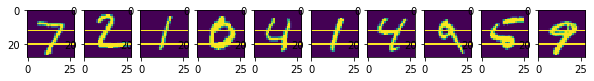

testMNIST (1000, 28, 28)


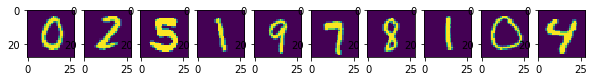

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
noise = np.random.uniform(0, 28)
fail_test = x_test[ :1000]
real_test = x_test[1001:2001]
fail_test[: , 12 , :] = 255
fail_test[: , 20 , :] = 255

fig, axs = plt.subplots(1,10, figsize=(10, 1))
print('brokenMNIST',fail_test.shape)
for i in range(10) :
    axs[i].imshow(fail_test[i])
plt.show()
plt.close()

fig, axs = plt.subplots(1,10, figsize=(10, 1))
print('testMNIST',real_test.shape)
for i in range(10) :
    axs[i].imshow(real_test[i])
plt.show()
plt.close()

# Discriminator input 형식에 맞게 reshape 
fail_fail = fail_test.reshape(fail_test.shape[0], 28, 28, 1)
real_real = real_test.reshape(real_test.shape[0], 28, 28, 1)

In [55]:
predictions_fail = Desc.predict(fail_fail)


for i in range(len(predictions_fail)) : 
    if predictions_fail[i] >= 0.5 : 
        print(i, predictions_fail[i],"MNIST입니다.")
        
#     else : 
#         print(predictions_fail[i],"not MNIST")
print()
predictions_real = Desc.predict(real_real)
for i in range(len(predictions_real)) : 
    if predictions_real[i] >= 0.5 : 
        print(i, predictions_real[i],"MNIST입니다.")


483 [1.] MNIST입니다.
597 [1.] MNIST입니다.
717 [1.] MNIST입니다.
909 [1.] MNIST입니다.
916 [1.] MNIST입니다.
919 [1.] MNIST입니다.

28 [0.99999905] MNIST입니다.
34 [1.] MNIST입니다.
52 [1.] MNIST입니다.
90 [1.] MNIST입니다.
148 [1.] MNIST입니다.
226 [1.] MNIST입니다.
344 [1.] MNIST입니다.
567 [1.] MNIST입니다.
718 [1.] MNIST입니다.
826 [1.] MNIST입니다.


1000
(array([483, 490, 597, 717, 909, 916, 919]), array([0, 0, 0, 0, 0, 0, 0]))
[1.]


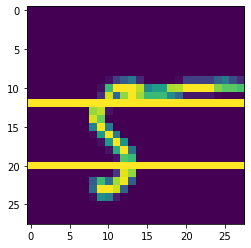

[1.]


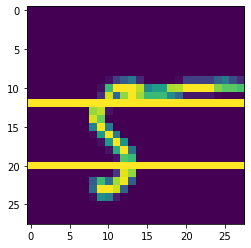

[0.00136334]


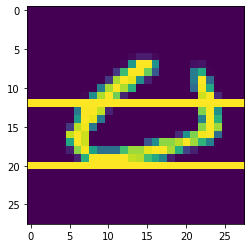

[1.]


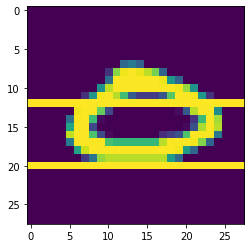

[1.]


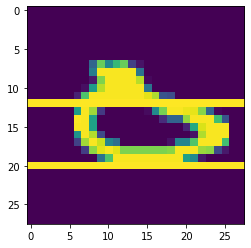

[1.]


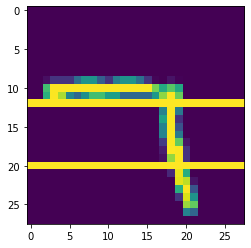

[1.]


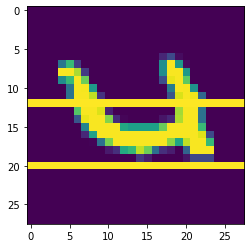

[1.]


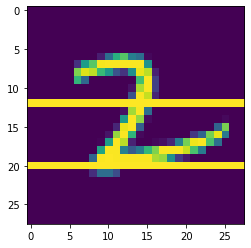

In [38]:
# brokenMNIST predict
predictions_fail = Desc.predict(fail_fail)
print(len(predictions_fail))

print(np.where(predictions_fail > 0 ))

print(predictions_fail[483])
plt.imshow(fail_test[483])
plt.show()
plt.close()

for i in range(len(predictions_fail)) :
    if predictions_fail[i] > 0 : 
        print(predictions_fail[i])
        plt.imshow(fail_test[i])
        plt.show()
        plt.close()


(array([ 28,  34,  52,  90, 148, 226, 344, 567, 573, 718, 826, 892]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
[0.99999905]


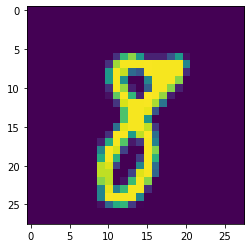

[1.]


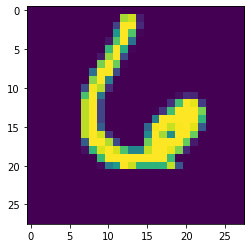

[1.]


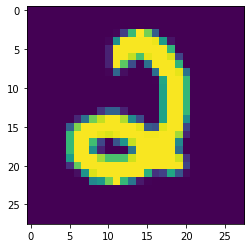

[1.]


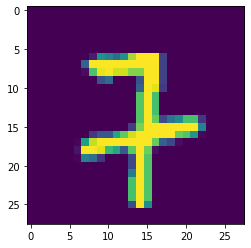

[1.]


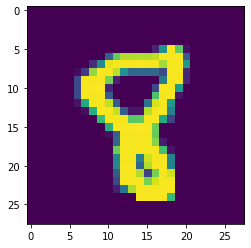

[1.]


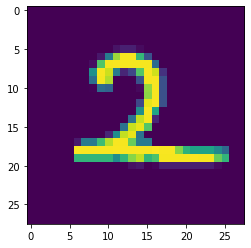

[1.]


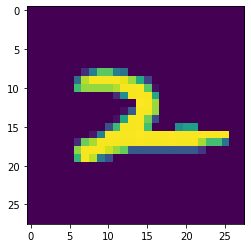

[1.]


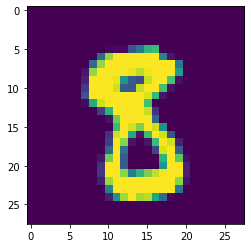

[0.01495466]


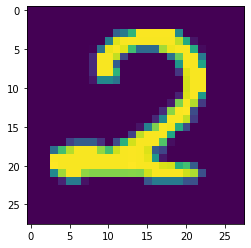

[1.]


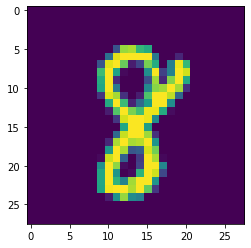

[1.]


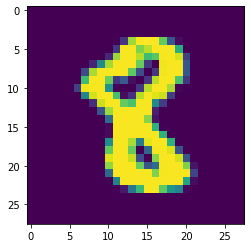

[5.990267e-06]


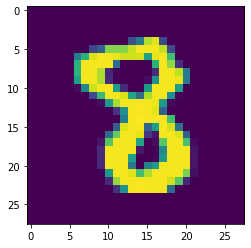

In [12]:
predictions_real = Desc.predict(real_real)

# real MNIST Predict (x_test) 
print(np.where(predictions_real > 0 ))

for i in range(len(predictions_real)) :
    if predictions_real[i] > 0 : 
        print(predictions_real[i])
        
        plt.imshow(real_test[i])
        plt.show()
        plt.close()

In [ ]:
### anomaly detection model define
def anomaly_detector(g=None, d=None):
    if g is None:
        g = generator_model()
        g.load_weights('weights/generator.h5')
    intermidiate_model = feature_extractor(d)
    intermidiate_model.trainable = False
    g = Model(inputs=g.layers[1].input, outputs=g.layers[-1].output)
    g.trainable = False
    # Input layer cann't be trained. Add new layer as same size & same distribution
    aInput = Input(shape=(10,))
    gInput = Dense((10), trainable=True)(aInput)
    gInput = Activation('sigmoid')(gInput)
    
    # G & D feature
    G_out = g(gInput)
    D_out= intermidiate_model(G_out)    
    model = Model(inputs=aInput, outputs=[G_out, D_out])
    model.compile(loss=sum_of_residual, loss_weights= [0.90, 0.10], optimizer='rmsprop')
    
    # batchnorm learning phase fixed (test) : make non trainable
    K.set_learning_phase(0)
    
    return model

### anomaly detection
def compute_anomaly_score(model, x, iterations=500, d=None):
    z = np.random.uniform(0, 1, size=(1, 10))
    
    intermidiate_model = feature_extractor(d)
    d_x = intermidiate_model.predict(x)

    # learning for changing latent
    loss = model.fit(z, [x, d_x], batch_size=1, epochs=iterations, verbose=0)
    similar_data, _ = model.predict(z)
    
    loss = loss.history['loss'][-1]
    
    return loss, similar_data
